# Naive Bayes Algorithm


## Introduction

## Algorithm of Naive Bayes

1. **Data Collection:**
   - Gather your dataset with labeled examples where each example has several features and a class label.

2. **Preprocessing:**
   - Clean the data, handle missing values, and convert any non-numeric data (e.g., text) into a numerical format.

3. **Calculate Class Probabilities:**
   - Determine how often each class appears in your dataset. This gives the probability of each class.

4. **Calculate Feature Probabilities:**
   - For each feature, count how often each value of the feature appears within each class. This tells you the likelihood of seeing each feature value in each class.

5. **Combine Probabilities:**
   - For a new example, consider each class and combine the probabilities of seeing the observed feature values with the class probabilities.

6. **Class Prediction:**
   - Choose the class that has the highest combined probability for the new example. This is the predicted class for the example.

7. **Model Evaluation:**
   - Test the model on a separate dataset and measure its performance using metrics like accuracy or precision.

8. **Use the Model:**
   - Apply the model to new, unseen data to make predictions.

## Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df=pd.read_csv('spam_or_not_spam.csv')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
df= df.fillna(' ')

In [4]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.columns

Index(['email', 'label'], dtype='object')

In [6]:
df.label.value_counts()

label
0    2500
1     500
Name: count, dtype: int64

In [7]:
x=df['email']

In [8]:
y=df['label']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [10]:
print( x_train.shape, x_test.shape)

(2400,) (600,)


In [11]:
x_train.head()

2592    get your favorite poker action at URL play aga...
87      i need to setup a vpn between a few sites from...
729      original message from john hall johnhall ever...
1065    once upon a time harri wrote title page has a ...
1998    url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...
Name: email, dtype: object

In [12]:
y_train.head()

2592    1
87      0
729     0
1065    0
1998    0
Name: label, dtype: int64

In [13]:
vector=CountVectorizer()

In [14]:
vector.fit(x_train)

CountVectorizer()

In [16]:
x_train_words=vector.get_feature_names_out()

In [17]:
x_train_words

array(['__', '___', '____', ..., '활황을', '훨씬', '힘입어'], dtype=object)

In [18]:
x_train_dtm=vector.transform(x_train)

In [19]:
x_train_dtm.shape

(2400, 29982)

In [21]:
x_train_dtm
x_test_dtm=vector.transform(x_test)

In [22]:
x_test_dtm.shape

(600, 29982)

In [23]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [24]:
model.fit(x_train_dtm,y_train)

MultinomialNB()

In [25]:
y_prediction=model.predict(x_test_dtm)

In [26]:
from sklearn import metrics

In [27]:
score=metrics.accuracy_score(y_test,y_prediction)
score

0.985

In [28]:
cf=metrics.confusion_matrix(y_test,y_prediction)
cf

array([[506,   1],
       [  8,  85]], dtype=int64)

In [29]:
import seaborn as sns

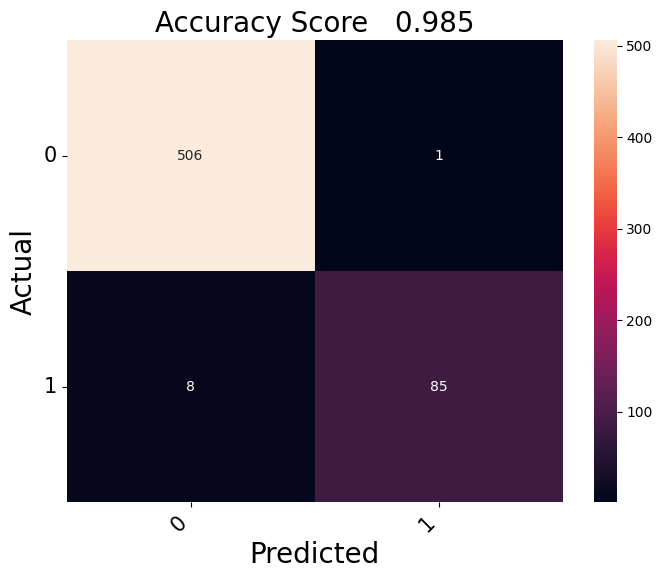

In [30]:
fig=plt.figure(figsize=(8,6))
heatmap = sns.heatmap(cf, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=15)
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.title('Accuracy Score   {0}'.format(score),fontsize=20)
plt.savefig('confusionmatrix')

In [31]:
x_test[y_test<y_prediction]

66     with our telecoms partner bumblebee don t get...
Name: email, dtype: object

In [32]:
x_test[y_test>y_prediction]

2758     dear sir madam i got this email id from your ...
2806                                                     
2906     this URL email is sponsored by thinkgeek welc...
2816     welcome to ghetto america yes you heard me i ...
2896    您好 如果此信打扰到您 我们深感抱歉 请将此信删除 如果您需要进行企业网站推广或者产品信息发...
2742     x m a h c x _ u a a x u d i i z q t b h y n x...
2744     sent e mail message from enenkio URL robert m...
2789     dear friends the online content business is d...
Name: email, dtype: object

### Spam and ham words

In [33]:
x_train_words=vector.get_feature_names_out()

In [34]:
x_train_words

array(['__', '___', '____', ..., '활황을', '훨씬', '힘입어'], dtype=object)

In [35]:
len(x_train_words)

29982

In [36]:
x_train_words[500:550]

array(['actions', 'activate', 'activated', 'activating', 'activation',
       'activations', 'active', 'activebuddy', 'actively', 'activespam',
       'activism', 'activist', 'activists', 'activities', 'activity',
       'actlab', 'acton', 'actor', 'actors', 'acts', 'actual', 'actually',
       'actuallyreverses', 'actualy', 'acuitive', 'acute',
       'acxrmplfnumberfhxlnumbermhyv', 'acynumberxpnumberjusobfmt', 'ad',
       'ada', 'adam', 'adamant', 'adams', 'adamson', 'adapt', 'adapted',
       'adapter', 'adapting', 'adays', 'adb', 'adbusters', 'add',
       'add_all_addresses_to_whitelist', 'added', 'addes', 'addicted',
       'addiction', 'addictions', 'addictive', 'addicts'], dtype=object)

In [37]:
model.feature_count_ 

array([[3., 1., 1., ..., 0., 0., 0.],
       [0., 0., 2., ..., 1., 1., 1.]])

In [38]:
model.feature_count_.shape

(2, 29982)

In [39]:
ham_word_count=model.feature_count_[0,:]

In [40]:
spam_word_count=model.feature_count_[1,:]

In [41]:
ham_word_count

array([3., 1., 1., ..., 0., 0., 0.])

In [42]:
tokens=pd.DataFrame({'token':x_train_words,'ham':ham_word_count,'spam':spam_word_count})

In [43]:
tokens.head()

,token,ham,spam
0,__,3.0,0.0
1,___,1.0,0.0
2,____,1.0,2.0
3,_____,1.0,12.0
4,______,1.0,9.0


In [44]:
tokens=tokens.set_index('token')

In [45]:
tokens.head()

,ham,spam
token,,
__,3.0,0.0
___,1.0,0.0
____,1.0,2.0
_____,1.0,12.0
______,1.0,9.0


In [46]:
tokens.tail()

,ham,spam
token,,
홈쇼핑의,0.0,1.0
확실한,0.0,1.0
활황을,0.0,1.0
훨씬,0.0,1.0
힘입어,0.0,1.0


In [47]:
model.class_count_

array([1993.,  407.])

In [48]:
tokens['ham']=tokens.ham+10

In [49]:
tokens['spam']=tokens.spam+10

In [50]:
tokens.head()

,ham,spam
token,,
__,13.0,10.0
___,11.0,10.0
____,11.0,12.0
_____,11.0,22.0
______,11.0,19.0


In [51]:
from __future__ import division

In [52]:
tokens['ham']=tokens.ham/model.class_count_[0]

In [53]:
tokens['spam']=tokens.spam/model.class_count_[1]

In [54]:
tokens.head()

,ham,spam
token,,
__,0.006523,0.024570
___,0.005519,0.024570
____,0.005519,0.029484
_____,0.005519,0.054054
______,0.005519,0.046683


In [55]:
tokens['ham_to_spam_ratio']=tokens.ham/tokens.spam

In [56]:
tokens.head()

,ham,spam,ham_to_spam_ratio
token,,,
__,0.006523,0.024570,0.265479
___,0.005519,0.024570,0.224636
____,0.005519,0.029484,0.187197
_____,0.005519,0.054054,0.102107
______,0.005519,0.046683,0.118230


In [58]:
tokens.tail()

,ham,spam,ham_to_spam_ratio
token,,,
홈쇼핑의,0.005018,0.027027,0.18565
확실한,0.005018,0.027027,0.18565
활황을,0.005018,0.027027,0.18565
훨씬,0.005018,0.027027,0.18565
힘입어,0.005018,0.027027,0.18565


In [59]:
tokens.sort_values('ham_to_spam_ratio',ascending=False).head(20)

,ham,spam,ham_to_spam_ratio
token,,,
wrote,0.366784,0.024570,14.928098
rpm,0.361264,0.024570,14.703462
spamassassin,0.312594,0.031941,9.786599
exmh,0.238836,0.024570,9.720622
razor,0.196187,0.024570,7.984797
_______________________________________________,0.277973,0.044226,6.285276
fork,0.150527,0.024570,6.126443
sep,0.179629,0.029484,6.092407
perl,0.143001,0.024570,5.820120


In [60]:
tokens.sort_values('ham_to_spam_ratio',ascending=False).tail(20)

,ham,spam,ham_to_spam_ratio
token,,,
yours,0.008028,0.157248,0.051054
cash,0.015554,0.307125,0.050645
guide,0.011039,0.221130,0.049919
mails,0.013046,0.262899,0.049622
membership,0.008028,0.162162,0.049507
bulk,0.008028,0.162162,0.049507
fill,0.009533,0.194103,0.049115
kabila,0.005018,0.103194,0.048623
earn,0.007025,0.144963,0.048458
